In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [50, 10]

In [96]:
fad = pd.read_csv('/Users/kryvoshei/Downloads/facebook_ads_data.csv')

In [97]:
fad.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [98]:
fad_1 = fad.loc[fad['ad_date'].between('2021-01-01', '2021-12-31')]
fad_1 = fad_1.groupby('ad_date').agg({'total_spend': 'sum', 'total_value': 'sum'})
fad_1['ROMI'] = fad_1['total_value'] / fad_1['total_spend']
fad_1

,total_spend,total_value,ROMI
ad_date,,,
2021-01-01,0.39,0.59,1.512821
2021-01-02,7.74,6.90,0.891473
2021-01-04,70.06,68.47,0.977305
2021-01-05,81.15,61.68,0.760074
2021-01-06,142.77,145.97,1.022414
...,...,...,...
2021-12-27,478.31,686.47,1.435199
2021-12-28,359.83,450.47,1.251897
2021-12-29,163.25,171.76,1.052129


1. Графік з щоденною сумою витрат на рекламу в 2021 році

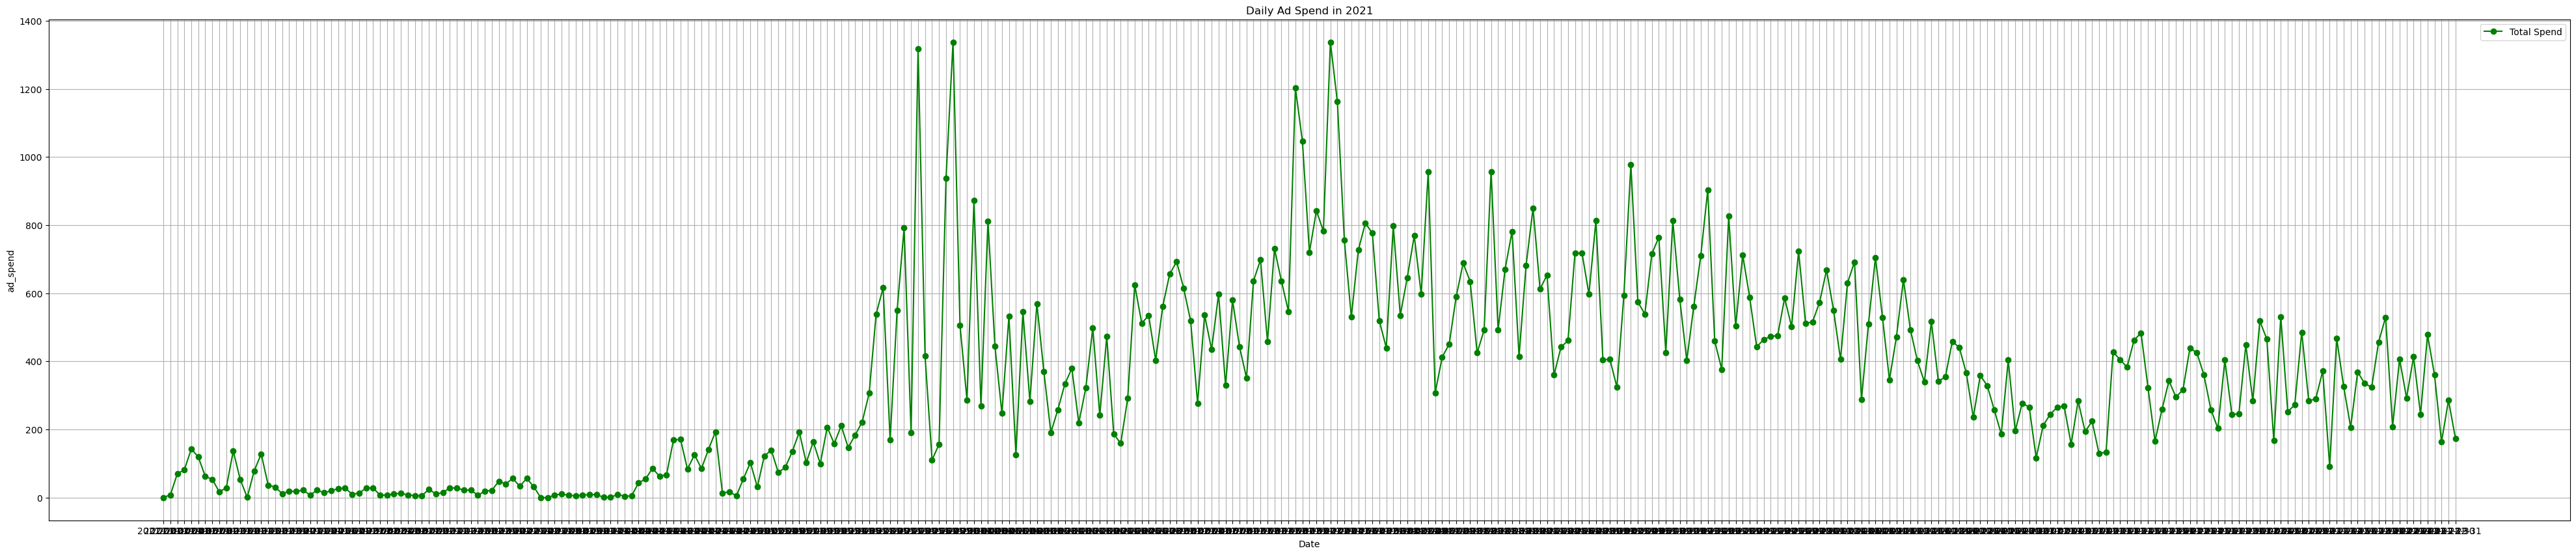

In [99]:
plt.plot(fad_1.index, fad_1['total_spend'], color = 'green', label='Total Spend', marker='o', linestyle='-')
plt.title('Daily Ad Spend in 2021')
plt.xlabel('Date')
plt.ylabel('ad_spend')
plt.legend()
plt.grid(True)
plt.show()

2. Графік з щоденним ROMI в 2021 році.

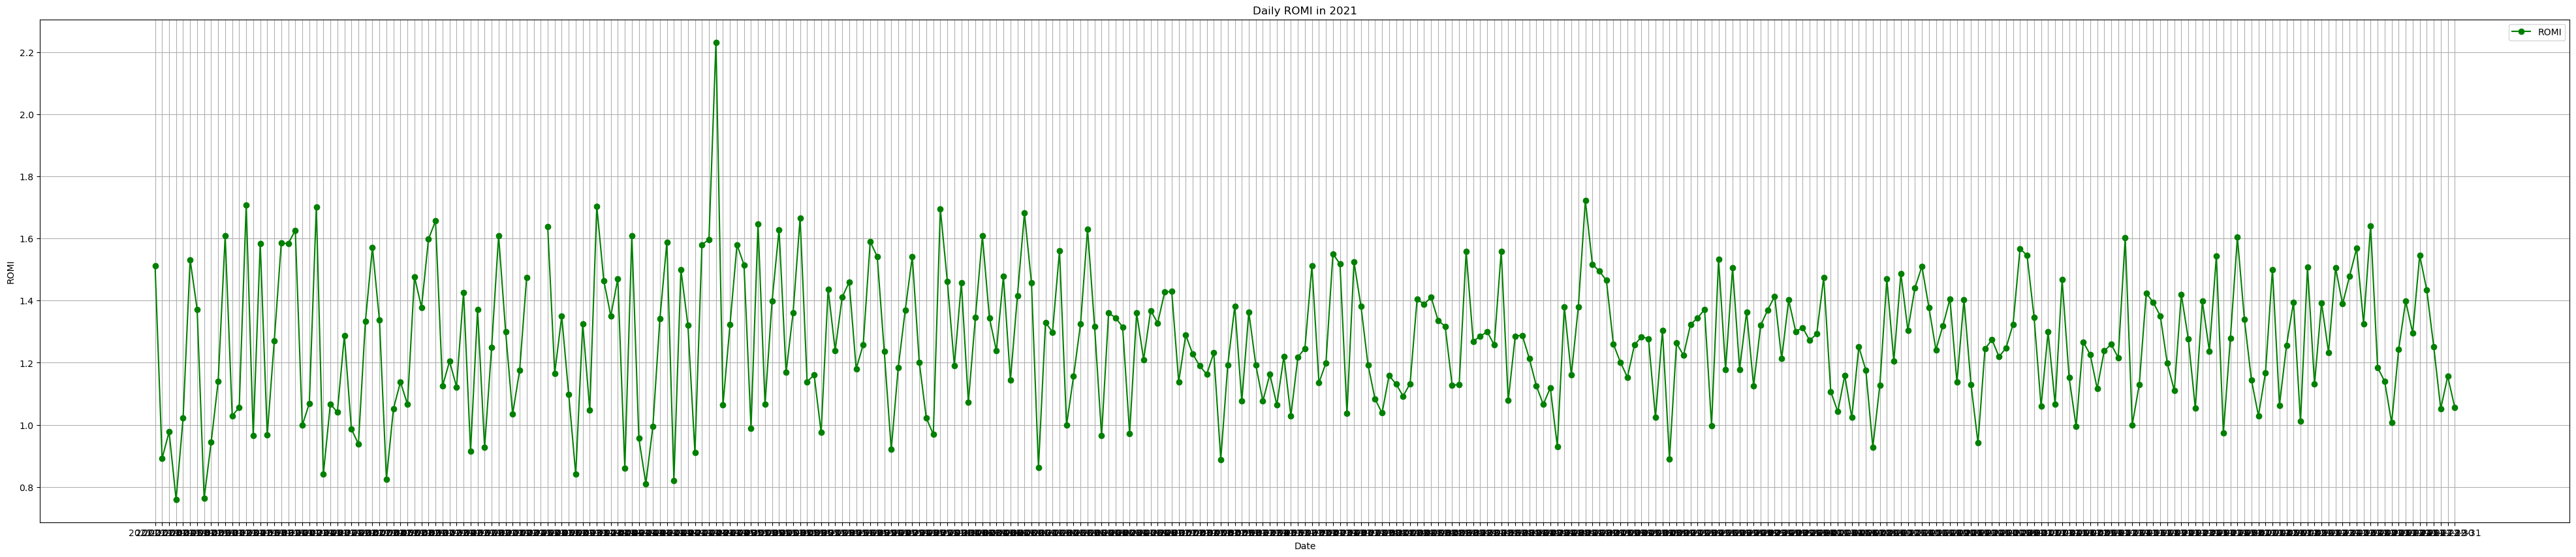

In [63]:
plt.plot(fad_1.index, fad_2['ROMI'], color='green', label='ROMI', marker='o', linestyle='-')
plt.title('Daily ROMI in 2021')
plt.xlabel('Date')
plt.ylabel('ROMI')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
fad_2 = fad.groupby('campaign_name').agg({'total_spend': 'sum','total_value': 'sum'})
fad_2['ROMI'] = fad_2['total_value'] / fad_2['total_spend']
fad_2

,total_spend,total_value,ROMI
campaign_name,,,
Brand,539.92,670.15,1.241202
Crazy discounts,2175.29,2583.59,1.187699
Discounts,2856.39,3516.27,1.231019
Electronics,23920.42,29169.38,1.219434
Expansion,67212.82,83288.66,1.239178
Hobbies,11326.97,13974.63,1.233748
Lookalike,63631.09,80234.70,1.260935
New items,2936.97,3742.05,1.274119
Promos,4993.84,8793.77,1.760923


3. Графік загальної суми витрат на рекламу в кожній з кампаній

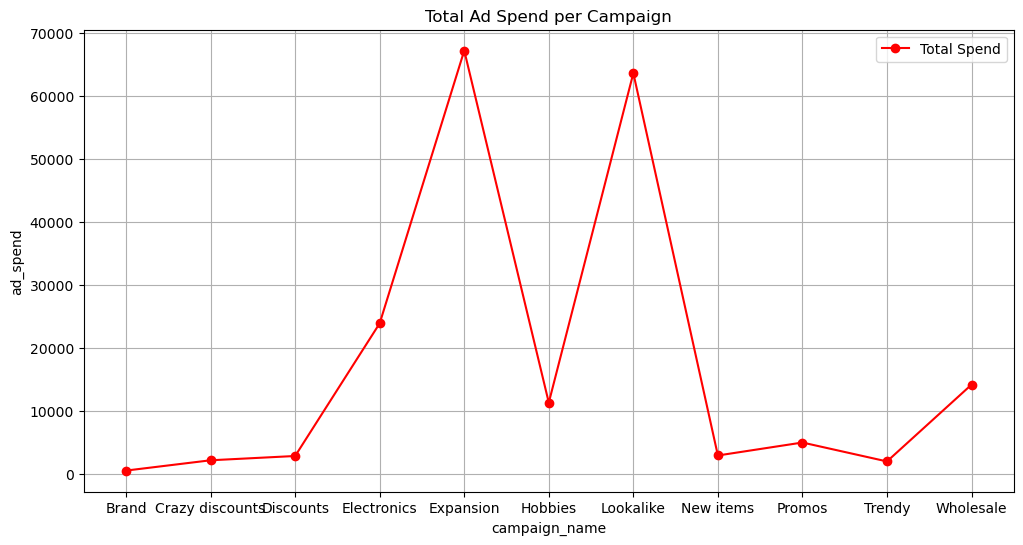

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(fad_2.index, fad_2['total_spend'], color = 'red', label='Total Spend', marker='o', linestyle='-')
plt.title('Total Ad Spend per Campaign')
plt.xlabel('campaign_name')
plt.ylabel('ad_spend')
plt.legend()
plt.grid(True)
plt.show()

4. Загальний ROMI в кожній з кампаній

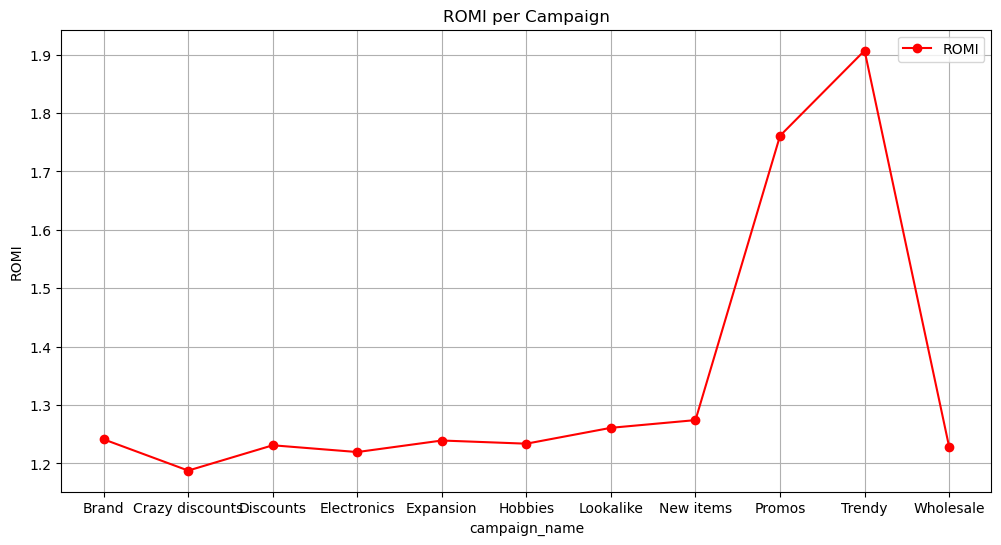

In [90]:
plt.figure(figsize=(12, 6))
plt.plot(fad_2.index, fad_2['ROMI'], color = 'red', label='ROMI', marker='o', linestyle='-')
plt.title('ROMI per Campaign')
plt.xlabel('campaign_name')
plt.ylabel('ROMI')
plt.legend()
plt.grid(True)
plt.show()

5. Pозкид щоденного ROMI в кожній кампаній (за назвою кампанії)

In [108]:
fad['ROMI'] = fad['total_value'] / fad['total_spend']

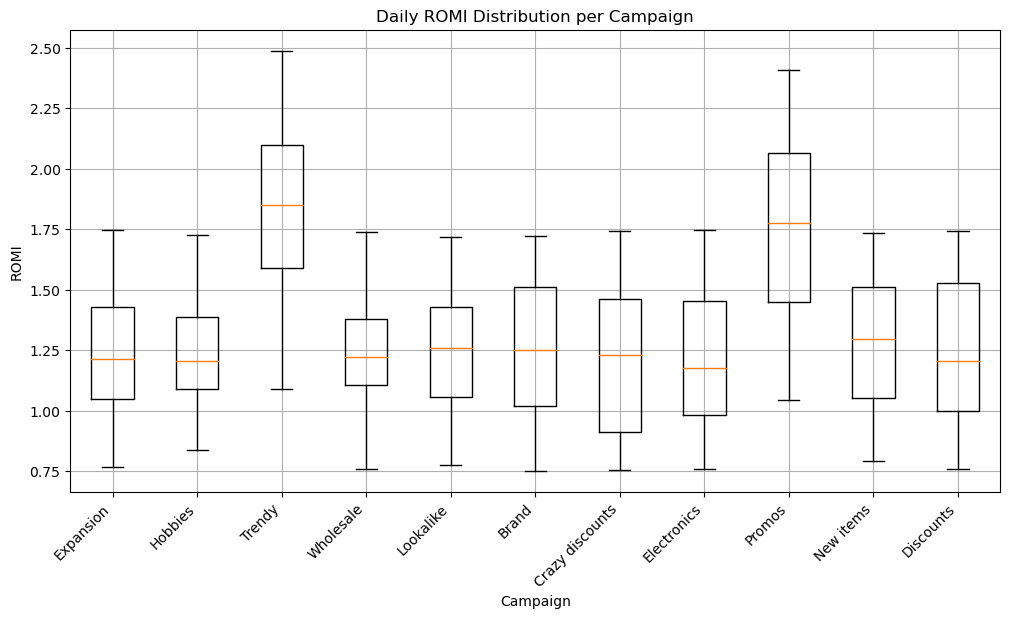

In [109]:
plt.figure(figsize=(12, 6))
plt.boxplot([fad[fad['campaign_name'] == campaign]['ROMI'].dropna().tolist() for campaign in fad['campaign_name'].unique()],
            labels=fad['campaign_name'].unique(), showfliers=False)
plt.title('Daily ROMI Distribution per Campaign')
plt.xlabel('Campaign')
plt.ylabel('ROMI')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

6. Гістограма з розподілом значень ROMI в таблиці facebook_ads_data.csv

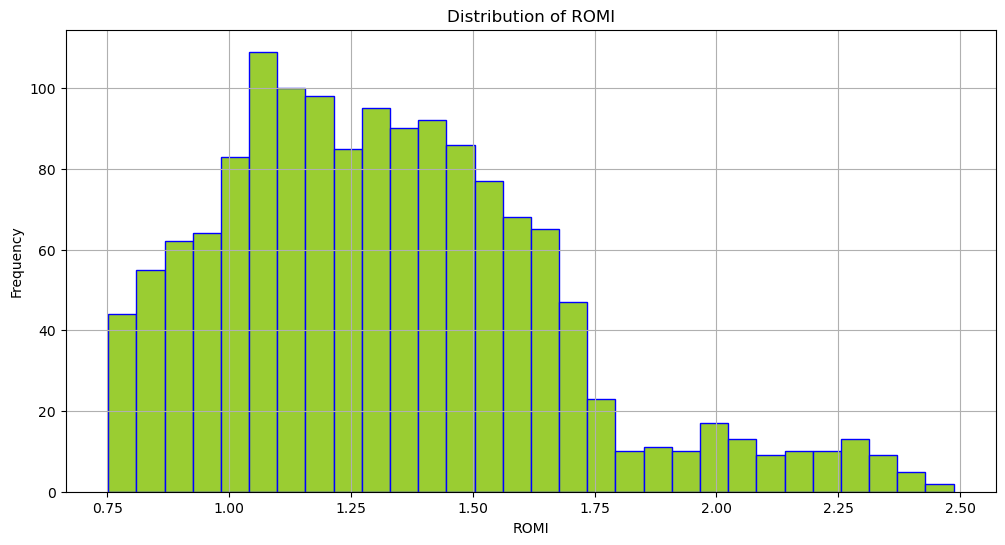

In [118]:
plt.figure(figsize=(12, 6))
plt.hist(fad['ROMI'].dropna(), bins=30, color='yellowgreen', edgecolor='blue')
plt.title('Distribution of ROMI')
plt.xlabel('ROMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

7. Tеплова карта кореляції між усіма числовими показниками в таблиці facebook_ads_data.csv. 
Які показники мають найвищу та найнижчу кореляцію? - найвища кореляція між total_spend та total_value (0.98), найнижча кореляція між cpm та ctr (0.12).
З чим корелює "total_value"? - total_value корелює з cpm, cpc, total_clicks, total_impressions, total_spend.

In [120]:
numeric_columns = fad.select_dtypes(include=['float64', 'int64']).columns
numeric_data = fad[numeric_columns]

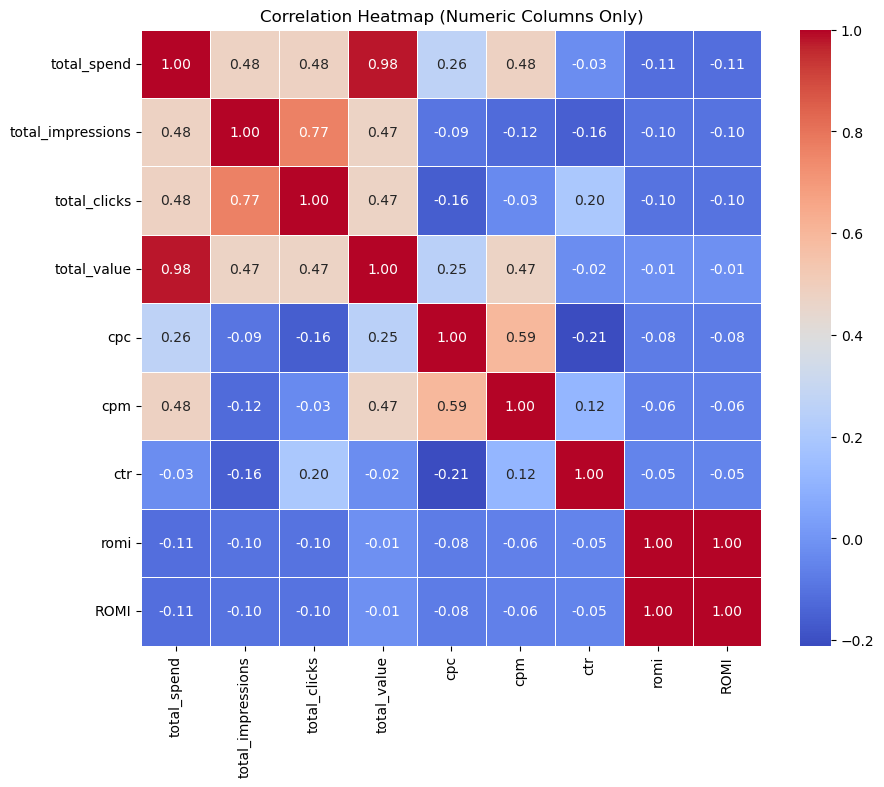

In [126]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()

8. Точкова діаграма з лінійною регресією, на основі даних з "total_spend" та "total_value" для візуалізації зв'язку між цими величинами.

C:\Users\kryvoshei\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


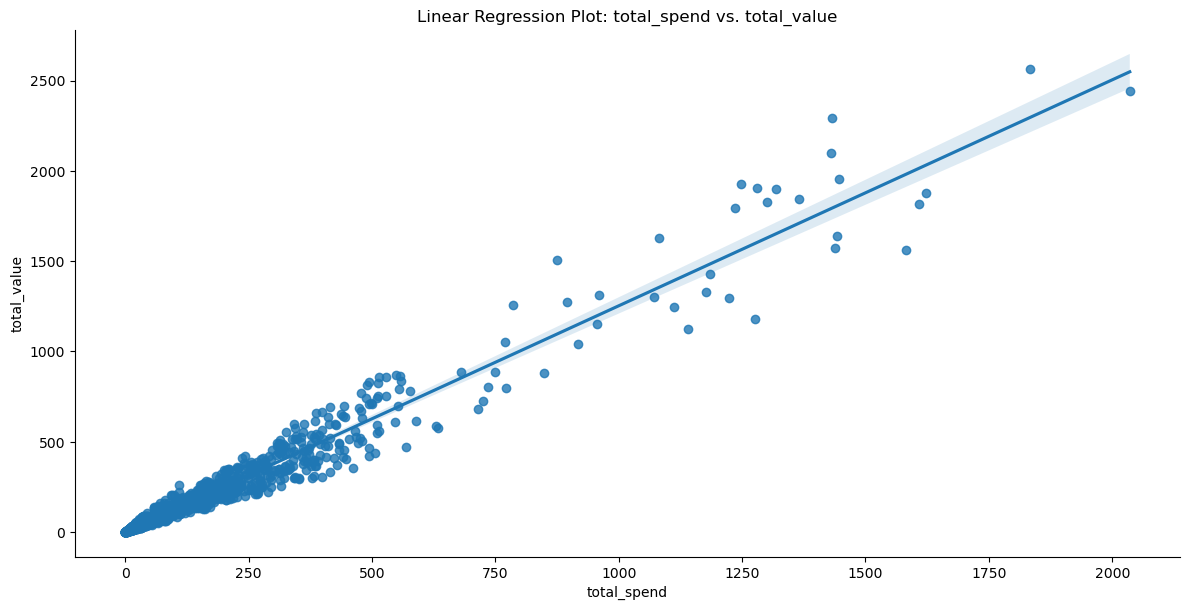

In [123]:
sns.lmplot(x='total_spend', y='total_value', data=fad, aspect=2, height=6)
plt.title('Linear Regression Plot: total_spend vs. total_value')
plt.show()